In [63]:
import pandas as pd
edge_group = 'doi_collectionType'
restore_alg = '_knn_results'
k = 1
path = 'path-to-data-repository'

In [2]:
mrr_df = pd.read_csv('{}metric_results/full_dynamic_mrr_{}{}.csv'.format(path, edge_group, restore_alg))
mrr_df

,algorithm,edge_group,split,dynamic_stage,value
0,bert,doi_collectionType,0.8,1st,0.874435
1,bert,doi_collectionType,0.8,2nd,0.932927
2,bert,doi_collectionType,0.8,3rd,0.943030
3,bert,doi_collectionType,0.8,4th,0.975309
4,bert,doi_collectionType,0.8,1st,0.861158
...,...,...,...,...,...
195,regularization,doi_collectionType,0.8,4th,0.927160
196,regularization,doi_collectionType,0.8,1st,0.903531
197,regularization,doi_collectionType,0.8,2nd,0.874498
198,regularization,doi_collectionType,0.8,3rd,0.954545


In [64]:
hits_df = pd.read_csv('{}metric_results/full_dynamic_hits@k_{}{}.csv'.format(path, edge_group, restore_alg))
hits_df

,k,algorithm,edge_group,split,dynamic_stage,value
0,1,deep_walk,doi_collectionType,0.8,1st,0.262712
1,1,deep_walk,doi_collectionType,0.8,2nd,0.084337
2,1,deep_walk,doi_collectionType,0.8,3rd,0.232143
3,1,deep_walk,doi_collectionType,0.8,4th,0.148148
4,1,deep_walk,doi_collectionType,0.8,1st,0.144068
...,...,...,...,...,...,...
1435,150,regularization,doi_collectionType,0.8,4th,1.000000
1436,150,regularization,doi_collectionType,0.8,1st,1.000000
1437,150,regularization,doi_collectionType,0.8,2nd,1.000000
1438,150,regularization,doi_collectionType,0.8,3rd,1.000000


In [65]:
execution_times_df = pd.read_csv('{}metric_results/execution_times.csv'.format(path))
execution_times_df['execution_time'] = execution_times_df['execution_time'].apply(lambda x: x/60)
execution_times_df = execution_times_df[execution_times_df['edge_group'] == edge_group].reset_index(drop=True)
execution_times_df

,algorithm,split,edge_group,dynamic_stage,execution_time
0,deep_walk,0.8,doi_collectionType,1st,0.484334
1,deep_walk,0.8,doi_collectionType,2nd,0.570966
2,deep_walk,0.8,doi_collectionType,3rd,0.643519
3,deep_walk,0.8,doi_collectionType,4th,0.668906
4,node2vec,0.8,doi_collectionType,1st,0.418458
...,...,...,...,...,...
155,metapath2vec,0.8,doi_collectionType,4th,0.207653
156,regularization,0.8,doi_collectionType,1st,0.387405
157,regularization,0.8,doi_collectionType,2nd,0.273482
158,regularization,0.8,doi_collectionType,3rd,0.201098


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from textwrap import wrap

sns.set(font_scale=1.4)
# colorblind mindful color palette
colors = ['#882255', '#44AA99', '#DDCC77', '#C988EE']
sns.set_palette(sns.color_palette(colors))

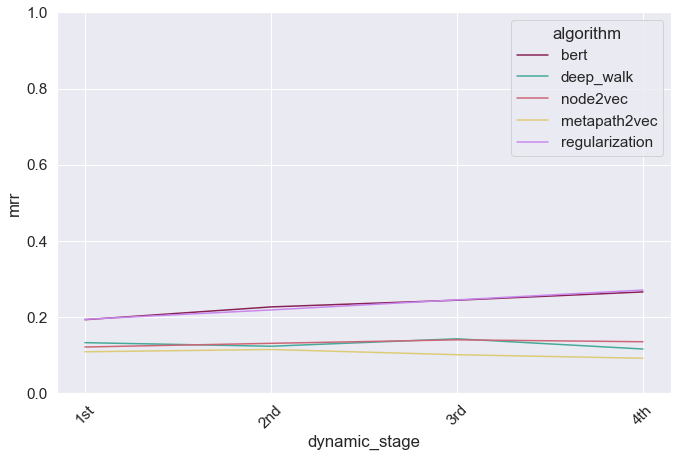

In [6]:
algorithm_order = {'deep_walk': 0, 'node2vec': 1, 'metapath2vec': 2, 'regularization': 3}
mrr_df['algorithm'] = pd.Categorical(mrr_df['algorithm'], 
      categories=sorted(algorithm_order, key=algorithm_order.get), 
      ordered=True)
mrr_df.sort_values(by=['algorithm', 'dynamic_stage'], inplace=True)
g = sns.lineplot(x="dynamic_stage", y="value", hue="algorithm",
        data=mrr_df)
g.set(ylim=(0.0, 1.0))
g.set_xlabel('dynamic_stage')
g.set_ylabel('mrr')
for idx, item in enumerate(g.get_xticklabels()):
    item.set_rotation(45)

g.get_figure().set_size_inches(11,7)
#g.get_figure().savefig('{}mrr.pdf.format(path)', bbox_inches='tight')
plt.show()

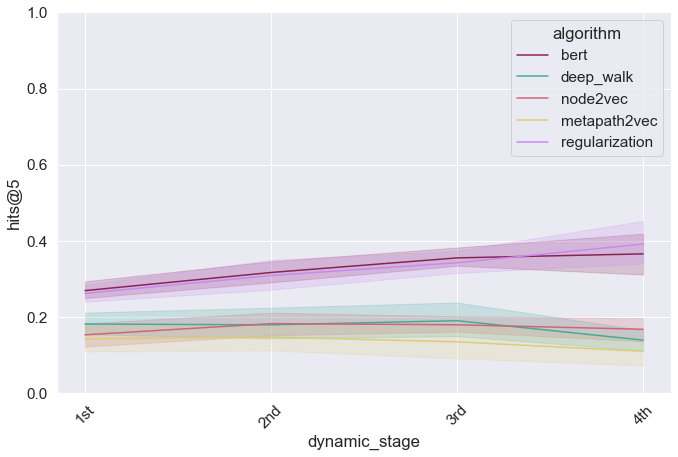

In [14]:
algorithm_order = {'deep_walk': 0, 'node2vec': 1, 'metapath2vec': 2, 'regularization': 3}
hits_df['algorithm'] = pd.Categorical(hits_df['algorithm'], 
      categories=sorted(algorithm_order, key=algorithm_order.get), 
      ordered=True)
hits_df = hits_df[hits_df['k'] == k].reset_index(drop=True)
hits_df.sort_values(by=['algorithm', 'dynamic_stage'], inplace=True)
g = sns.lineplot(x="dynamic_stage", y="value", hue="algorithm",
        data=hits_df)
g.set(ylim=(0.0, 1.0))
g.set_xlabel('dynamic_stage')
g.set_ylabel(f'hits@{k}')
for idx, item in enumerate(g.get_xticklabels()):
    item.set_rotation(45)
g.get_figure().set_size_inches(11,7)
#g.get_figure().savefig('{}mrr.pdf.format(path)', bbox_inches='tight')
plt.show()

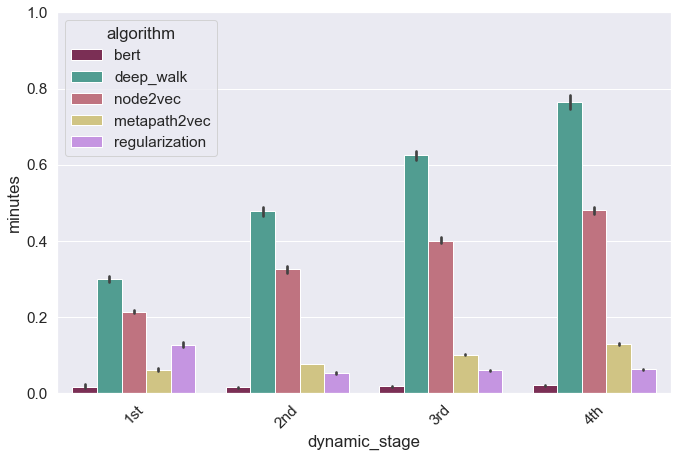

In [15]:
algorithm_order = {'deep_walk': 0, 'node2vec': 1, 'metapath2vec': 2, 'regularization': 3}
execution_times_df['algorithm'] = pd.Categorical(execution_times_df['algorithm'], 
      categories=sorted(algorithm_order, key=algorithm_order.get), 
      ordered=True)
execution_times_df.sort_values(by=['algorithm', 'dynamic_stage'], inplace=True)
g = sns.barplot(x="dynamic_stage", y="execution_time", hue="algorithm",
        data=execution_times_df)
g.set(ylim=(0.0, 1.0))
g.set_xlabel('dynamic_stage')
g.set_ylabel('minutes')
for idx, item in enumerate(g.get_xticklabels()):
    item.set_rotation(45)
g.get_figure().set_size_inches(11,7)
#g.get_figure().savefig('{}execution_times.pdf.format(path)', bbox_inches='tight')
plt.show()

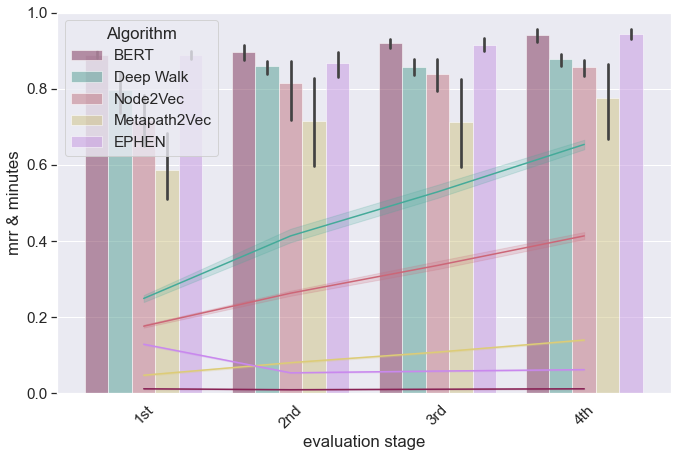

In [6]:
fig, ax1 = plt.subplots(figsize=(11,7))

algorithm_order = {'deep_walk': 0, 'node2vec': 1, 'metapath2vec': 2, 'regularization': 3}
mrr_df['algorithm'] = pd.Categorical(mrr_df['algorithm'], 
      categories=sorted(algorithm_order, key=algorithm_order.get), 
      ordered=True)
mrr_df.sort_values(by=['algorithm', 'dynamic_stage'], inplace=True)
edge_group_names = {'doi_name': 'compound name', 'doi_bioActivity': 'bio activity', 'doi_collectionSpecie': 'collection specie', 'doi_collectionSite': 'collection site', 'doi_collectionType': 'collection type'}
g = sns.barplot(x="dynamic_stage", y="value", hue="algorithm",
        data=mrr_df, alpha=0.5, ax=ax1)
#g.set_title("\n".join(wrap('mrr performance metric and execution time in minutes for predicting {}'.format(edge_group_names[edge_group]))), fontsize=18)
g.set(ylim=(0.0, 1.0))
g.set_xlabel('evaluation stage')
g.set_ylabel('mrr & minutes')
for idx, item in enumerate(g.get_xticklabels()):
    item.set_rotation(45)
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ['Deep Walk', 'Node2Vec', 'Metapath2Vec', 'EPHEN'], 
          title='Algorithm', loc='upper left')

ax2 = ax1.twinx()

execution_times_df['algorithm'] = pd.Categorical(execution_times_df['algorithm'], 
      categories=sorted(algorithm_order, key=algorithm_order.get), 
      ordered=True)
execution_times_df.sort_values(by=['algorithm', 'dynamic_stage'], inplace=True)
g = sns.lineplot(x="dynamic_stage", y="execution_time", hue="algorithm",
        data=execution_times_df, ax=ax2, legend=False)
g.set(ylim=(0.0, 1.0))
g.set_xlabel('evaluation stage')
#g.set_ylabel('minutes')

ax2.set_axis_off()
ax2.grid(False)
g.get_figure().savefig('{}graphs/mrr_execution_times_{}.pdf'.format(path, edge_group), bbox_inches='tight')
plt.show()

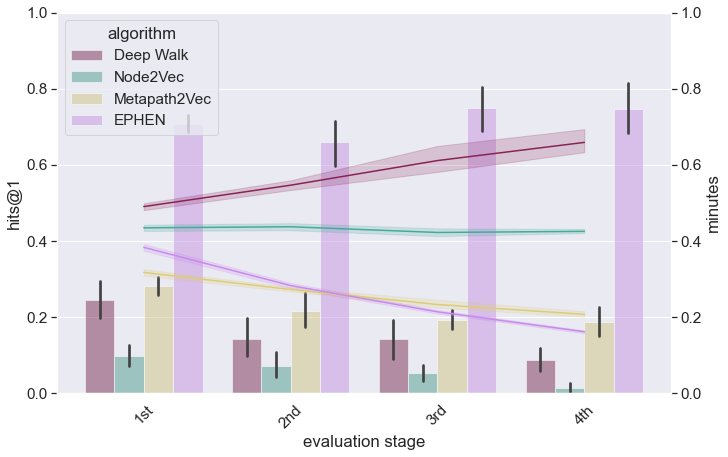

In [66]:
fig, ax1 = plt.subplots(figsize=(11,7))

algorithm_order = {'deep_walk': 0, 'node2vec': 1, 'metapath2vec': 2, 'regularization': 3}
hits_df['algorithm'] = pd.Categorical(hits_df['algorithm'], 
      categories=sorted(algorithm_order, key=algorithm_order.get), 
      ordered=True)
hits_df = hits_df[hits_df['k'] == k].reset_index(drop=True)
hits_df.sort_values(by=['algorithm', 'dynamic_stage'], inplace=True)
edge_group_names = {'doi_name': 'compound name', 'doi_bioActivity': 'bio activity', 'doi_collectionSpecie': 'collection specie', 'doi_collectionSite': 'collection site', 'doi_collectionType': 'collection type'}
g = sns.barplot(x="dynamic_stage", y="value", hue="algorithm",
        data=hits_df, alpha=0.5, ax=ax1)
#g.set_title("\n".join(wrap('hits@5 performance metric and execution time in minutes for predicting {}'.format(edge_group_names[edge_group]))), fontsize=18)
g.set(ylim=(0.0, 1.0))
g.set_xlabel('evaluation stage')
g.set_ylabel(f'hits@{k}')
#g.set_ylabel(f'hits@{k} & minutes')
for idx, item in enumerate(g.get_xticklabels()):
    item.set_rotation(45)
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ['Deep Walk', 'Node2Vec', 'Metapath2Vec', 'EPHEN'], 
          title='algorithm', loc='upper left')

ax2 = ax1.twinx()

execution_times_df['algorithm'] = pd.Categorical(execution_times_df['algorithm'], 
      categories=sorted(algorithm_order, key=algorithm_order.get), 
      ordered=True)
execution_times_df.sort_values(by=['algorithm', 'dynamic_stage'], inplace=True)
g = sns.lineplot(x="dynamic_stage", y="execution_time", hue="algorithm",
        data=execution_times_df, legend=False)
g.set(ylim=(0.0, 1.0))
g.set_xlabel('evaluation stage')
g.set_ylabel('minutes')

#ax2.set_axis_off()
ax2.grid(False)
g.get_figure().savefig('{}graphs/hits_execution_times_{}.pdf'.format(path, edge_group), bbox_inches='tight')
plt.show()

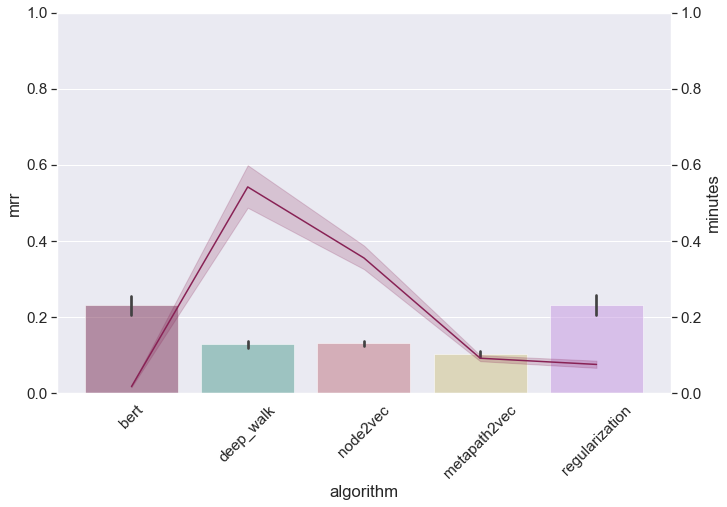

In [12]:
fig, ax1 = plt.subplots(figsize=(11,7))

algorithm_order = {'bert': 0, 'deep_walk': 1, 'node2vec': 2, 'metapath2vec': 3, 'regularization': 4}
mrr_df['algorithm'] = pd.Categorical(mrr_df['algorithm'], 
      categories=sorted(algorithm_order, key=algorithm_order.get), 
      ordered=True)
mrr_df.sort_values(by=['algorithm', 'dynamic_stage'], inplace=True)
g = sns.barplot(x="algorithm", y="value",
        data=mrr_df, alpha=0.5, ax=ax1)
g.set(ylim=(0.0, 1.0))
g.set_xlabel('algorithm')
g.set_ylabel('mrr')
for idx, item in enumerate(g.get_xticklabels()):
    item.set_rotation(45)

ax2 = ax1.twinx()

execution_times_df['algorithm'] = pd.Categorical(execution_times_df['algorithm'], 
      categories=sorted(algorithm_order, key=algorithm_order.get), 
      ordered=True)
execution_times_df.sort_values(by=['algorithm', 'dynamic_stage'], inplace=True)
g = sns.lineplot(x="algorithm", y="execution_time",
        data=execution_times_df, legend=False, ax=ax2)
g.set(ylim=(0.0, 1.0))
g.set_xlabel('algorithm')
g.set_ylabel('minutes')

ax2.grid(False)
plt.show()

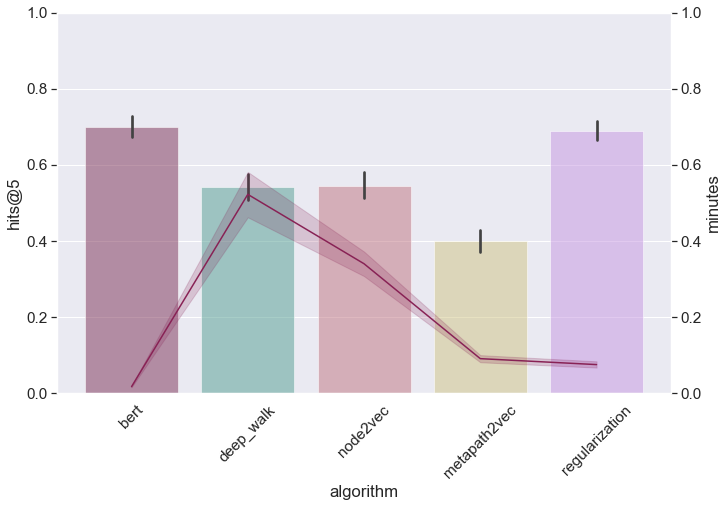

In [23]:
fig, ax1 = plt.subplots(figsize=(11,7))

algorithm_order = {'bert': 0, 'deep_walk': 1, 'node2vec': 2, 'metapath2vec': 3, 'regularization': 4}
hits_df['algorithm'] = pd.Categorical(hits_df['algorithm'], 
      categories=sorted(algorithm_order, key=algorithm_order.get), 
      ordered=True)
hits_df.sort_values(by=['algorithm', 'dynamic_stage'], inplace=True)
g = sns.barplot(x="algorithm", y="value",
        data=hits_df, alpha=0.5, ax=ax1)
g.set(ylim=(0.0, 1.0))
g.set_xlabel('algorithm')
g.set_ylabel('hits@5')
for idx, item in enumerate(g.get_xticklabels()):
    item.set_rotation(45)

ax2 = ax1.twinx()

execution_times_df['algorithm'] = pd.Categorical(execution_times_df['algorithm'], 
      categories=sorted(algorithm_order, key=algorithm_order.get), 
      ordered=True)
execution_times_df.sort_values(by=['algorithm', 'dynamic_stage'], inplace=True)
g = sns.lineplot(x="algorithm", y="execution_time",
        data=execution_times_df, legend=False, ax=ax2)
g.set(ylim=(0.0, 1.0))
g.set_xlabel('algorithm')
g.set_ylabel('minutes')


ax2.grid(False)

plt.show()